# Data Wrangling

## Content

## Imports

In [1]:
import pandas as pd
import numpy as np
import re
import requests
import matplotlib.pyplot as plt

fire_df = pd.read_csv('../data/raw/California_Fire_Incidents.csv')
climate_df = pd.read_csv('../data/raw/environ_conditions.csv')

The `fire_df` reads data collected by Ares on Kaggle. This user scraped [data](https://www.kaggle.com/datasets/ananthu017/california-wildfire-incidents-20132020) about California's wildfires in 2013-2020 from [Cal Fire's website](https://www.fire.ca.gov/incidents/) using Selenium. There should be 40 columns and about 1600 rows.

Meanwhile, `climate_df` contains data from the California Environmental Conditions [dataset](https://www.kaggle.com/datasets/chelseazaloumis/cimis-dataset-with-fire-target) scraped by Kaggle user Chelsea Zaloumis from [CIMIS](https://cimis.water.ca.gov/Default.aspx) using Selenium. There should be 19 columns.

## Load Data

In [2]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AcresBurned           1633 non-null   float64
 1   Active                1636 non-null   bool   
 2   AdminUnit             1636 non-null   object 
 3   AirTankers            28 non-null     float64
 4   ArchiveYear           1636 non-null   int64  
 5   CalFireIncident       1636 non-null   bool   
 6   CanonicalUrl          1636 non-null   object 
 7   ConditionStatement    284 non-null    object 
 8   ControlStatement      111 non-null    object 
 9   Counties              1636 non-null   object 
 10  CountyIds             1636 non-null   object 
 11  CrewsInvolved         171 non-null    float64
 12  Dozers                123 non-null    float64
 13  Engines               191 non-null    float64
 14  Extinguished          1577 non-null   object 
 15  Fatalities           

In [3]:
fire_df.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [4]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128125 entries, 0 to 128124
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Stn Id                128125 non-null  int64  
 1   Stn Name              128125 non-null  object 
 2   CIMIS Region          128125 non-null  object 
 3   Date                  128125 non-null  object 
 4   ETo (in)              128042 non-null  float64
 5   Precip (in)           128125 non-null  float64
 6   Sol Rad (Ly/day)      128125 non-null  float64
 7   Avg Vap Pres (mBars)  128125 non-null  float64
 8   Max Air Temp (F)      128122 non-null  float64
 9   Min Air Temp (F)      128124 non-null  float64
 10  Avg Air Temp (F)      128120 non-null  float64
 11  Max Rel Hum (%)       128125 non-null  float64
 12  Min Rel Hum (%)       128125 non-null  float64
 13  Avg Rel Hum (%)       128112 non-null  float64
 14  Dew Point (F)         128112 non-null  float64
 15  

In [5]:
climate_df.head()

,Stn Id,Stn Name,CIMIS Region,Date,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Min Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Min Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F),Target
0,2,FivePoints,San Joaquin Valley,1/1/2018,0.06,0.00,219.0,7.3,63.4,35.3,47.8,82.0,46.0,65.0,36.6,3.3,78.3,51.1,0
1,2,FivePoints,San Joaquin Valley,1/2/2018,0.04,0.00,127.0,7.4,59.8,37.7,47.2,80.0,52.0,67.0,36.7,3.1,74.5,51.3,0
2,2,FivePoints,San Joaquin Valley,1/3/2018,0.04,0.00,125.0,8.4,61.1,37.3,49.9,79.0,49.0,68.0,39.9,4.5,107.5,51.3,0
3,2,FivePoints,San Joaquin Valley,1/4/2018,0.07,0.01,219.0,11.6,69.2,48.7,56.8,94.0,52.0,74.0,48.5,5.8,140.2,53.0,0
4,2,FivePoints,San Joaquin Valley,1/5/2018,0.07,0.00,239.0,12.7,73.8,47.5,59.8,94.0,49.0,72.0,50.8,4.2,101.4,54.4,0


## Data Definition

### Column Definitions

The `fire_df` has 40 columns.

| Column | Dtype | Description |
| --- | --- | --- |
| AcresBurned | float64 | Acres of land affected(?) by wildfires |
| Active | bool | Is the fire active or contained? |
| AdminUnit | object | Administrative unit |
| AirTankers | float64 | Resources assigned |
| ArchiveYear | int64 | Year the data was archived |
| CalFireIncident | bool | Is the incident treated as a CalFire incident? |
| CanonicalUrl | object | Part of URL for the information source |
| ConditionStatement | object | Status updates |
| ControlStatement | object | Information about current road closures and threats |
| Counties | object | County name |
| CountyIds | object | List of county IDs |
| CrewsInvolved | float64 | Resources assigned |
| Dozers | float64 | Resources assigned |
| Engines | float64 | Resources assigned |
| Extinguished | object | Date the fire was extinguished |
| Fatalities | float64 | Fatality count |
| Featured | bool | ? |
| Final | bool | ? |
| FuelType | object | Fuel type of the fire |
| Helicopters | float64 | Resources assigned |
| Injuries | float64 | Count of injured personnel |
| Latitude | float64 | Latitude of wildfire incident |
| Location | object | Description of the location |
| Longitude | float64 | Longitude of the wildfire incident |
| MajorIncident | bool | Is the fire considerd a major incident or not? |
| Name | object | Name of the wildfire |
| PercentContained | float64 | What percent of the fire is contained? |
| PersonnelInvolved | float64 | Resources assigned |
| Public | bool | ? |
| SearchDescription | object | "Description" meta content in HTML head |
| SearchKeywords | object | "Keywords" meta content in HTML head |
| Started | object | Date the fire started |
| Status | object | Status of the fire |
| StructuresDamaged | float64 | Count of structures damaged |
| StructuresDestroyed | float64 | Count of structures destroyed |
| StructuresEvacuated | float64 | Count of structures evacuated |
| StructuresThreatened | float64 | Count of structures threatened |
| UniqueId | object | Unique ID for the wildfire incident |
| Updated | object | Last date of update |
| WaterTenders | float64 | Resources assigned |

The `climate_df` has 19 columns. Measurements are daily.

| Column | Dtype | Description |
| --- | --- | --- |
| Stn Id | int64 | ID of the station |
| Stn Name | object | Name of the station |
| CIMIS Region | object | Region of the station |
| Date | object | Date of the measurements |
| ETo (in) | float64 | Reference evapotranspiration |
| Precip (in) | float64 | Precipitation |
| Sol Rad (Ly/day) | float64 | Average solar radiation |
| Avg Vap Pres (mBars) | float64 | Average vapor pressure |
| Max Air Temp (F) | float64 | Maximum air temperature |
| Min Air Temp (F) | float64 | Minimum air temperature |
| Avg Air Temp (F) | float64 | Average air temperature |
| Max Rel Hum (%) | float64 | Maximum relative humidity |
| Min Rel Hum (%) | float64 | Minimum relative humidity |
| Avg Rel Hum (%) | float64 | Average relative humidity |
| Dew Point (F) | float64 | Dew point |
| Avg Wind Speed (mph) | float64 | Average wind speed |
| Wind Run (miles) | float64 | Wind run |
| Avg Soil Temp (F) | float64 | Average soil temperature |
| Target | int64 | Geography or weather station of interest |

### Missing Values

In [6]:
missing_fire = pd.concat([fire_df.isnull().sum(), 100 * fire_df.isnull().mean()], axis = 1)
missing_fire.columns = ['count', '%']
missing_fire.sort_values(by='%', ascending=False)

,count,%
StructuresEvacuated,1636,100.000000
FuelType,1624,99.266504
Fatalities,1615,98.716381
AirTankers,1608,98.288509
StructuresThreatened,1606,98.166259
StructuresDamaged,1569,95.904645
Helicopters,1552,94.865526
ControlStatement,1525,93.215159
Injuries,1516,92.665037
Dozers,1513,92.481663


Glancing over random fire incidents already revealed that the information was not standardized across all fires. A lot of information is not given, so having so many missing values is not surprising. The sheer diversity of the fires also means that a lot of fires will not have required the same resources or will not have had the same effects on their surroundings. From the information that we are given, perhaps the most important ones at least do seem to be mostly provided; that is, information about common characteristics of fires that may be useful include the following: name, location, dates, and affected acres.

In [7]:
# Completely empty entry will be ignored
fire_df = fire_df.drop(columns = ['StructuresEvacuated'])
fire_df.columns

Index(['AcresBurned', 'Active', 'AdminUnit', 'AirTankers', 'ArchiveYear',
       'CalFireIncident', 'CanonicalUrl', 'ConditionStatement',
       'ControlStatement', 'Counties', 'CountyIds', 'CrewsInvolved', 'Dozers',
       'Engines', 'Extinguished', 'Fatalities', 'Featured', 'Final',
       'FuelType', 'Helicopters', 'Injuries', 'Latitude', 'Location',
       'Longitude', 'MajorIncident', 'Name', 'PercentContained',
       'PersonnelInvolved', 'Public', 'SearchDescription', 'SearchKeywords',
       'Started', 'Status', 'StructuresDamaged', 'StructuresDestroyed',
       'StructuresThreatened', 'UniqueId', 'Updated', 'WaterTenders'],
      dtype='object')

In [8]:
missing_climate = pd.concat([climate_df.isnull().sum(), 100 * climate_df.isnull().mean()], axis = 1)
missing_climate.columns = ['count', '%']
missing_climate.sort_values(by='%', ascending=False)

,count,%
ETo (in),83,0.064780
Avg Soil Temp (F),20,0.015610
Dew Point (F),13,0.010146
Avg Rel Hum (%),13,0.010146
Avg Air Temp (F),5,0.003902
Max Air Temp (F),3,0.002341
Min Air Temp (F),1,0.000780
Max Rel Hum (%),0,0.000000
Wind Run (miles),0,0.000000
Avg Wind Speed (mph),0,0.000000


Also unsurprising is that the information from the weather stations is very tidy and inclusive.

### Categorical Features

#### Fire Data
Each value in `Counties` would exist in California, which will be verified using [Wikipedia](https://simple.wikipedia.org/wiki/List_of_counties_in_California). Other things we could check for are uniqueness in `Name` and `UniqueId`.

In [9]:
ca_county_url = 'https://simple.wikipedia.org/wiki/List_of_counties_in_California'
ca_counties = pd.read_html(ca_county_url)
type(ca_counties)

list

In [10]:
len(ca_counties)

1

In [11]:
ca_counties = ca_counties[0]
ca_counties.head()

,County,FIPS code[1],County seat[2],Established[2],Formed from,Meaning of name[3],Population,Area[2],Map
0,Alameda County,1,Oakland,1853,Contra Costa and Santa Clara,"Spanish for ""avenue shaded by trees"" or ""cotto...",1510271,"738 sq mi(1,911 km2)",NaN
1,Alpine County,3,Markleeville,1864,"Amador, El Dorado, Calaveras, Mono and Tuolumne",Location high in the Sierra Nevada.,1175,"739 sq mi(1,914 km2)",NaN
2,Amador County,5,Jackson,1854,Calaveras,"Jose Maria Amador (1794–1883), a soldier, ranc...",38091,"606 sq mi(1,570 km2)",NaN
3,Butte County,7,Oroville,1850,Original,"Sutter Buttes, mistakenly thought to be in the...",220000,"1,640 sq mi(4,248 km2)",NaN
4,Calaveras County,9,San Andreas,1850,Original,"Calaveras River; calaveras is Spanish for ""sku...",45578,"1,020 sq mi(2,642 km2)",NaN


In [12]:
# Verify that there are 58 out of 58 counties
len(ca_counties)

58

In [13]:
ca_counties_sub = ca_counties.iloc[:, [0]].copy()
ca_counties_sub.columns = ['county']

# Trimming off 'County' because our fire_df doesn't include it
county_df = ca_counties_sub.apply(lambda x: x.replace({' County':''}, regex=True))
county_df

,county
0,Alameda
1,Alpine
2,Amador
3,Butte
4,Calaveras
5,Colusa
6,Contra Costa
7,Del Norte
8,El Dorado
9,Fresno


In [14]:
fire_df['Counties'].value_counts()

Riverside          146
San Diego           89
Butte               66
San Luis Obispo     64
Shasta              64
Kern                62
Fresno              57
Siskiyou            57
San Bernardino      53
Tehama              51
Lake                49
Los Angeles         46
Monterey            45
Santa Clara         39
El Dorado           37
Madera              36
Lassen              36
Tulare              35
Mariposa            35
Alameda             32
Modoc               31
Ventura             30
Santa Barbara       29
Mendocino           28
Contra Costa        27
Napa                25
Humboldt            25
Calaveras           22
Tuolumne            22
Trinity             21
Stanislaus          20
San Benito          20
Solano              19
Sonoma              18
Nevada              17
Placer              17
Merced              16
Yuba                14
Amador              13
Yolo                12
Inyo                12
Sacramento          11
Plumas              11
Orange     

In [15]:
set(fire_df['Counties']) - set(county_df['county'])

{'Mexico', 'State of Nevada', 'State of Oregon'}

All of the actual counties are valid Californian counties. These are California's neighbors whose fires crossed into California territory, so a question could be, "Do we include them in our data?"

In [16]:
dup_fireNames = fire_df.duplicated(subset=['Name'], keep=False)
dup_fires_by_name = fire_df[dup_fireNames == True]
dup_fires_by_name.loc[dup_fires_by_name['Name'] == 'Mountain Fire'].T

,2,576,1434,1579
AcresBurned,27531.0,35.0,600.0,30.0
Active,False,False,False,False
AdminUnit,CAL FIRE Riverside Unit / San Bernardino Natio...,CAL FIRE Shasta-Trinity Unit,CAL FIRE Shasta-Trinity Unit,Alameda County Fire
AirTankers,NaN,NaN,NaN,NaN
ArchiveYear,2013,2016,2019,2019
CalFireIncident,True,True,True,False
CanonicalUrl,/incidents/2013/7/15/mountain-fire/,/incidents/2016/8/9/mountain-fire/,/incidents/2019/8/22/mountain-fire/,/incidents/2019/6/21/mountain-fire/
ConditionStatement,NaN,NaN,All evacuations and road closures have been li...,NaN
ControlStatement,NaN,NaN,NaN,NaN
Counties,Riverside,Shasta,Shasta,Alameda


Glancing at it like this, the fires may have the same name, but there are at least some rows that are clearly different fires altogether. Luckily there is a feature that should differentiate the fires, the `UniqueIds`.

In [17]:
dup_fireIds = fire_df.duplicated(subset=['UniqueId'], keep=False)
dup_fires_by_id = fire_df[dup_fireIds == True]
dup_fires_by_id.T

,13,14,66,67,148,149,150,151,180,181,...,1067,1068,1069,1070,1368,1369,1376,1377,1590,1591
AcresBurned,4346.0,4346.0,163.0,163.0,28.0,28.0,28.0,28.0,4300.0,4300.0,...,63311.0,48920.0,48920.0,48920.0,0.0,0.0,289.0,289.0,25.0,25.0
Active,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AdminUnit,CAL FIRE / USFS Los Padres National Forest,CAL FIRE / USFS Los Padres National Forest,CAL FIRE / Sacramento Metropolitan Fire,CAL FIRE / Sacramento Metropolitan Fire,CAL FIRE Sonoma-Lake-Napa Unit,CAL FIRE Sonoma-Lake-Napa Unit,CAL FIRE Sonoma-Lake-Napa Unit,CAL FIRE Sonoma-Lake-Napa Unit,CAL FIRE Sonoma-Lake-Napa Unit,CAL FIRE Sonoma-Lake-Napa Unit,...,USFS Shasta-Trinity National Forest,Unified command: CAL FIRE Mendocino Unit and U...,Unified command: CAL FIRE Mendocino Unit and U...,Unified command: CAL FIRE Mendocino Unit and U...,Ventura County Fire and Santa Barbara County F...,Ventura County Fire and Santa Barbara County F...,CAL FIRE San Benito-Monterey Unit and CAL FIRE...,CAL FIRE San Benito-Monterey Unit and CAL FIRE...,CAL FIRE San Diego Unit,CAL FIRE San Diego Unit
AirTankers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ArchiveYear,2013,2013,2013,2013,2013,2013,2013,2013,2014,2014,...,2018,2018,2018,2018,2018,2018,2019,2019,2019,2019
CalFireIncident,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,False,True,True,True,True
CanonicalUrl,/incidents/2013/5/15/grand-fire/,/incidents/2013/5/15/grand-fire/,/incidents/2013/7/19/50-fire/,/incidents/2013/7/19/50-fire/,/incidents/2013/6/10/sonoma-lake-napa-unit-lig...,/incidents/2013/6/10/sonoma-lake-napa-unit-lig...,/incidents/2013/6/10/sonoma-lake-napa-unit-lig...,/incidents/2013/6/10/sonoma-lake-napa-unit-lig...,/incidents/2014/7/1/butts-fire/,/incidents/2014/7/1/butts-fire/,...,/incidents/2018/9/5/delta-fire/,/incidents/2018/7/27/river-fire-mendocino-comp...,/incidents/2018/7/27/river-fire-mendocino-comp...,/incidents/2018/7/27/river-fire-mendocino-comp...,/incidents/2018/1/9/montecito-flooding-mudflows/,/incidents/2018/1/9/montecito-flooding-mudflows/,/incidents/2019/10/9/cross-fire/,/incidents/2019/10/9/cross-fire/,/incidents/2019/8/25/border-10-fire/,/incidents/2019/8/25/border-10-fire/
ConditionStatement,<p>Little to no fire behavior has been observe...,<p>Little to no fire behavior has been observe...,NaN,NaN,"Current Situation: 28 remote wildland fires, r...","Current Situation: 28 remote wildland fires, r...","Current Situation: 28 remote wildland fires, r...","Current Situation: 28 remote wildland fires, r...",With the current weather conditions and elevat...,With the current weather conditions and elevat...,...,NaN,<p>To sign up to receive news releases and fac...,<p>To sign up to receive news releases and fac...,<p>To sign up to receive news releases and fac...,Flooding and mudflows in the Santa Barbara Cou...,Flooding and mudflows in the Santa Barbara Cou...,NaN,NaN,Air and ground resources have made progress in...,Air and ground resources have made progress in...
ControlStatement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All road closures have been lifted.,All road closures have been lifted.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Counties,Kern,Ventura,El Dorado,Sacramento,Sonoma,Solano,Lake,Colusa,Napa,Lake,...,Trinity,Colusa,Lake,Mendocino,Santa Barbara,Ventura,Monterey,San Luis Obispo,Mexico,San Diego


In [18]:
print(dup_fires_by_id['UniqueId'].nunique())
print(list(set(dup_fires_by_id['UniqueId'])))

22
['676946dc-1b38-4a09-9bbe-9ce638cfed52', '92d7aeea-7abf-47a4-bf76-a4fe0fac65c6', '97ff14e8-6d08-4214-ad3b-847fa3a0e84a', '207f72f7-1453-40dc-919e-3551f7041b22', '5ce45b6c-81b5-422c-9078-8c68dd872c8a', '90b0daf7-5d84-42d9-bb35-bb78d4faf950', '94a7ae52-fed9-4997-b972-1761aa4b89ca', '2437bb57-1d09-4892-8c26-a60661dae1d9', 'ba818380-4001-46a2-ac04-d5f322cdf3b9', 'b604ffa7-8cee-4724-bb82-f1f4553a192f', 'e0d038e9-0926-4c05-8317-ec7075a04b12', 'af30fe23-6cfd-4fd6-b2d9-91648eeae814', '82c2aafa-ef04-49f0-a172-0dfa8a15582e', '4630e9ce-88ec-4159-9bc9-25ff5f8216cc', 'a21faf4f-3628-4e24-ac64-8471d9d12560', 'd28bc34e-73a8-454d-9e55-dea7bdd40bee', '808c34bb-4e64-4eb5-9c3e-2a1e58195074', '240b1f55-0f4e-448d-a4ce-3ecfec7a6c9d', '4d07ccc3-32be-4a1d-acac-18333884c97d', 'be79d28c-767d-4a0d-b168-e86a5842004f', '23cbd274-ded3-43ea-9174-b5615eac3244', '7ed61f45-7e2b-449b-8ead-d34b75a5e818']


In [19]:
#dup_list_fires_by_id = [dup_fires_by_id.groupby('UniqueId').get_group(uid) for uid in list(set(dup_fires_by_id['UniqueId']))]

dup_fires_by_id[dup_fires_by_id['UniqueId'] == '90b0daf7-5d84-42d9-bb35-bb78d4faf950'].T.dropna().drop_duplicates()

,1054,1055,1056,1057
AcresBurned,410203.0,410203.0,410203.0,410203.0
Active,False,False,False,False
AdminUnit,USFS Mendocino National Forest,USFS Mendocino National Forest,USFS Mendocino National Forest,USFS Mendocino National Forest
ArchiveYear,2018,2018,2018,2018
CalFireIncident,True,True,True,True
CanonicalUrl,/incidents/2018/7/27/ranch-fire-mendocino-comp...,/incidents/2018/7/27/ranch-fire-mendocino-comp...,/incidents/2018/7/27/ranch-fire-mendocino-comp...,/incidents/2018/7/27/ranch-fire-mendocino-comp...
ConditionStatement,The fire has transitioned to the USFS Mendocin...,The fire has transitioned to the USFS Mendocin...,The fire has transitioned to the USFS Mendocin...,The fire has transitioned to the USFS Mendocin...
Counties,Colusa,Glenn,Lake,Mendocino
CountyIds,"6,11,17,23","6,11,17,23","6,11,17,23","6,11,17,23"
Extinguished,2019-01-04T09:33:00Z,2019-01-04T09:33:00Z,2019-01-04T09:33:00Z,2019-01-04T09:33:00Z


The difference seems only to be in `Counties`, which are accounted for in `CountyIds`.

In [20]:
fire_df_dropped_dups = fire_df.drop_duplicates(subset=['UniqueId'])
fire_dup_check = fire_df_dropped_dups.duplicated(subset=['UniqueId'], keep=False)
remaining_dups = fire_df_dropped_dups[fire_dup_check == True]
assert remaining_dups.shape[0] == 0

In [21]:
fire_df = fire_df_dropped_dups
fire_df[fire_df['UniqueId'] == '90b0daf7-5d84-42d9-bb35-bb78d4faf950'].T

,1054
AcresBurned,410203.0
Active,False
AdminUnit,USFS Mendocino National Forest
AirTankers,NaN
ArchiveYear,2018
CalFireIncident,True
CanonicalUrl,/incidents/2018/7/27/ranch-fire-mendocino-comp...
ConditionStatement,The fire has transitioned to the USFS Mendocin...
ControlStatement,NaN
Counties,Colusa


In [22]:
county_select = fire_df[['Counties', 'CountyIds']]
county_select.sort_values('Counties').head()

,Counties,CountyIds
890,Alameda,1
1128,Alameda,1
1384,Alameda,1
1391,Alameda,1
1292,Alameda,1


In [23]:
county_select.sort_values('Counties').tail()

,Counties,CountyIds
346,Yuba,58
1037,Yuba,58
644,Yuba,58
410,Yuba,58
910,Yuba,58


In [24]:
county_select[~county_select['Counties'].isin(county_df['county'])]

,Counties,CountyIds
1421,Mexico,62
1423,State of Oregon,61
1424,State of Nevada,59
1590,Mexico,"62,37"


CountyIds were assigned in alphabetical order, and the 'counties' that are not California counties are 59, 61, and 62, which are Nevada, Oregon, and Mexico.

In [25]:
county_df.sort_values('county', inplace=True)
county_df['countyId'] = [x for x in range(1,59)]
county_df

,county,countyId
0,Alameda,1
1,Alpine,2
2,Amador,3
3,Butte,4
4,Calaveras,5
5,Colusa,6
6,Contra Costa,7
7,Del Norte,8
8,El Dorado,9
9,Fresno,10


In [26]:
not_county_df = pd.DataFrame([['State of Nevada', 59], ['State of Oregon', 61], ['Mexico', 62]], columns=['county', 'countyId'])
county_df = pd.concat([county_df,not_county_df]).reset_index(drop=True)

In [27]:
county_df

,county,countyId
0,Alameda,1
1,Alpine,2
2,Amador,3
3,Butte,4
4,Calaveras,5
...,...,...
56,Yolo,57
57,Yuba,58
58,State of Nevada,59
59,State of Oregon,61


In [28]:
def make_county_list(county_ids):
    """
    Given a list of county IDs, return a list of corresponding counties.
    """
    #ids = re.split(r'\D+', county_ids)
    ids = re.findall(r'\d+', county_ids)
    #print(ids)
    #print([county_df[county_df['countyId']==int(x)]['county'].iat[0] for x in ids])
    return [county_df[county_df['countyId']==int(x)]['county'].iat[0] for x in ids]

#[re.split(r'\D+', x) for x in list(fire_df['CountyIds'].values)]

fire_df['Counties List'] = fire_df['CountyIds'].apply(make_county_list)
fire_df['Counties List']

0          [Tuolumne]
1       [Los Angeles]
2         [Riverside]
3            [Placer]
4           [Ventura]
            ...      
1631      [Riverside]
1632         [Nevada]
1633           [Yolo]
1634      [San Diego]
1635      [Riverside]
Name: Counties List, Length: 1609, dtype: object

#### Climate Data
Stations and ID numbers will be verified.

In [29]:
cimis_stations_url = 'http://et.water.ca.gov/api/station'
r = requests.get(cimis_stations_url)
json_data = r.json()
json_data.get('Stations')

[{'StationNbr': '1',
  'Name': 'Fresno/F.S.U. USDA',
  'City': 'Fresno',
  'RegionalOffice': 'South Central Region Office',
  'County': 'Fresno',
  'ConnectDate': '6/7/1982',
  'DisconnectDate': '9/25/1988',
  'IsActive': 'False',
  'IsEtoStation': 'True',
  'Elevation': '340',
  'GroundCover': 'Grass',
  'HmsLatitude': "36º48'52N / 36.814444",
  'HmsLongitude': "-119º43'54W / -119.731670",
  'ZipCodes': ['93766',
   '93762',
   '93761',
   '93760',
   '93759',
   '93755',
   '93750',
   '93747',
   '93745',
   '93744',
   '93741',
   '93740',
   '93729',
   '93728',
   '93727',
   '93726',
   '93725',
   '93724',
   '93722',
   '93721',
   '93720',
   '93718',
   '93717',
   '93716',
   '93715',
   '93714',
   '93711',
   '93710',
   '93709',
   '93708',
   '93707',
   '93706',
   '93705',
   '93704',
   '93703',
   '93702',
   '93701',
   '93650',
   '93234',
   '93668',
   '93660',
   '93656',
   '93652',
   '93609',
   '93608',
   '93607'],
  'SitingDesc': ''},
 {'StationNbr': '2',

In [30]:
stations_df = pd.DataFrame(json_data.get('Stations'))
stations_df.head()

,StationNbr,Name,City,RegionalOffice,County,ConnectDate,DisconnectDate,IsActive,IsEtoStation,Elevation,GroundCover,HmsLatitude,HmsLongitude,ZipCodes,SitingDesc
0,1,Fresno/F.S.U. USDA,Fresno,South Central Region Office,Fresno,6/7/1982,9/25/1988,False,True,340,Grass,36º48'52N / 36.814444,-119º43'54W / -119.731670,"[93766, 93762, 93761, 93760, 93759, 93755, 937...",
1,2,FivePoints,Five Points,South Central Region Office,Fresno,6/7/1982,12/31/2050,True,True,285,Grass,36º20'10N / 36.336222,-120º6'46W / -120.112910,[93624],
2,3,Beach /Santa Cruz CO,Watsonville,South Central Region Office,Santa Cruz,5/30/1982,8/25/1986,False,True,10,Grass,36º52'50N / 36.880556,-121º47'36W / -121.793330,"[95077, 95076, 95075, 95019, 95018]",
3,4,Webb /Santa Cruz CO,Watsonville,South Central Region Office,Santa Cruz,5/30/1982,4/29/1988,False,True,230,Grass,36º58'21N / 36.9725,-121º43'34W / -121.726110,"[95077, 95076, 95075, 95019, 95018]",
4,5,Shafter,Shafter,South Central Region Office,Kern,6/1/1982,12/31/2050,True,True,360,Grass,35º31'57N / 35.532556,-119º16'54W / -119.281790,"[93263, 93280, 93388]",


In [31]:
stations_subset = stations_df[['StationNbr', 'Name']]
climate_stations = climate_df[['Stn Id', 'Stn Name']]
stations_subset.describe()

,StationNbr,Name
count,267,267
unique,267,262
top,1,San Diego
freq,1,2


In [32]:
climate_stations = climate_stations.drop_duplicates()
climate_stations

,Stn Id,Stn Name
0,2,FivePoints
88,5,Shafter
174,6,Davis
263,7,Firebaugh/Telles
351,12,Durham
...,...,...
127738,183,Owens Lake North
127745,189,Owens Lake South
127938,231,Lompoc
127945,232,Santa Maria II


In [33]:
set(climate_stations['Stn Name']).issubset(set(stations_subset['Name']))

True

In [34]:
stations_subset['StationNbr'] = stations_subset['StationNbr'].astype('int')
stations_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StationNbr  267 non-null    int32 
 1   Name        267 non-null    object
dtypes: int32(1), object(1)
memory usage: 3.3+ KB


C:\Users\chian\AppData\Local\Temp\ipykernel_5108\2661583773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_subset['StationNbr'] = stations_subset['StationNbr'].astype('int')


In [35]:
set(climate_stations['Stn Id']).issubset(set(stations_subset['StationNbr']))

True

### Numeric Features

#### Fire Data
These are date features which can be converted from objects to dates and can be checked to be within 2013-2020: ArchiveYear, Extinguished, Started, and Updated. These features could be checked for realistic values: AcresBurned, AirTankers, CrewsInvolved, Dozers, Engines, Fatalities, Helicopters, Injuries, Latitude(?), Longitude(?), PercentContained, PersonnelInvolved, StructuresDamaged, StructuresDestroyed, StructuresThreatened, and WaterTenders.

In [53]:
fire_df['ArchiveYear'] = pd.to_datetime(fire_df['ArchiveYear'], format='%Y').dt.year
fire_df['Extinguished'] = pd.to_datetime(fire_df['Extinguished'])
fire_df['Started'] = pd.to_datetime(fire_df['Started'])
fire_df['Updated'] = pd.to_datetime(fire_df['Updated'])
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609 entries, 0 to 1635
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   AcresBurned           1606 non-null   float64            
 1   Active                1609 non-null   bool               
 2   AdminUnit             1609 non-null   object             
 3   AirTankers            28 non-null     float64            
 4   ArchiveYear           1609 non-null   int64              
 5   CalFireIncident       1609 non-null   bool               
 6   CanonicalUrl          1609 non-null   object             
 7   ConditionStatement    261 non-null    object             
 8   ControlStatement      109 non-null    object             
 9   Counties              1609 non-null   object             
 10  CountyIds             1609 non-null   object             
 11  CrewsInvolved         165 non-null    float64            
 12  Dozers

In [63]:
fire_df[['ArchiveYear', 'Extinguished', 'Started', 'Updated']].agg(['min', 'max'])

,ArchiveYear,Extinguished,Started,Updated
min,2013,1969-12-31 16:00:00+00:00,1969-12-31 16:00:00+00:00,1969-12-31 16:00:00+00:00
max,2019,2019-12-14 08:22:00+00:00,2019-11-25 19:59:12+00:00,2020-01-10 16:13:09.923000+00:00


The max are acceptable, but the min show a few bad dates.

In [77]:
fire_df[fire_df['Extinguished'] < pd.to_datetime('2013-01-01 00:00:00+00:00')].T

,392,571
AcresBurned,52.0,38.0
Active,False,False
AdminUnit,Santa Barbara County Fire,Tahoe National Forest
AirTankers,NaN,NaN
ArchiveYear,2015,2016
CalFireIncident,True,False
CanonicalUrl,/incidents/2015/8/1/white-fire/,/incidents/2016/9/7/phoenix-fire/
ConditionStatement,NaN,NaN
ControlStatement,NaN,NaN
Counties,Santa Barbara,Nevada


In [78]:
fire_df[fire_df['Started'] < pd.to_datetime('2013-01-01 00:00:00+00:00')].T

,1019,1261
AcresBurned,12.0,45.0
Active,False,False
AdminUnit,CAL FIRE Madera-Mariposa-Merced Unit,Marin County Fire
AirTankers,NaN,NaN
ArchiveYear,2017,2018
CalFireIncident,True,False
CanonicalUrl,/incidents/2017/12/31/taglio-fire/,/incidents/2018/12/31/bridge-fire/
ConditionStatement,NaN,NaN
ControlStatement,NaN,NaN
Counties,Merced,Marin


In [79]:
fire_df[fire_df['Updated'] < pd.to_datetime('2013-01-01 00:00:00+00:00')].T

,392,571
AcresBurned,52.0,38.0
Active,False,False
AdminUnit,Santa Barbara County Fire,Tahoe National Forest
AirTankers,NaN,NaN
ArchiveYear,2015,2016
CalFireIncident,True,False
CanonicalUrl,/incidents/2015/8/1/white-fire/,/incidents/2016/9/7/phoenix-fire/
ConditionStatement,NaN,NaN
ControlStatement,NaN,NaN
Counties,Santa Barbara,Nevada


The CanoncicalUrl provides links to the data source, so these dates can be checked.
- [White Fire](https://www.fire.ca.gov/incidents/2015/8/1/white-fire/) has 1969 listed for the Extinguished and Updated dates.
- [Phoenix Fire](https://www.fire.ca.gov/incidents/2016/9/7/phoenix-fire/) has 1969 listed for the Extinguished and Updated dates.
- [Taglio Fire](https://www.fire.ca.gov/incidents/2017/12/31/taglio-fire/) has 1969 listed for the Started date.
- [Bridge Fire](https://www.fire.ca.gov/incidents/2018/12/31/bridge-fire/) has 1969 listed for the Started date.

In [83]:
fire_df.describe().T

,count,mean,std,min,25%,50%,75%,max
AcresBurned,1606.0,3241.598381,18670.755103,0.00000,35.00000,97.00000,400.000000,410203.0000
AirTankers,28.0,4.071429,6.399818,0.00000,2.00000,2.00000,4.000000,27.0000
ArchiveYear,1609.0,2016.612803,1.841306,2013.00000,2015.00000,2017.00000,2018.000000,2019.0000
CrewsInvolved,165.0,11.030303,13.676321,0.00000,2.00000,6.00000,13.000000,82.0000
Dozers,118.0,6.194915,10.418802,0.00000,1.00000,2.00000,5.000000,76.0000
Engines,185.0,21.264865,33.740057,0.00000,5.00000,10.00000,23.000000,256.0000
Fatalities,13.0,10.846154,22.999443,1.00000,1.00000,3.00000,6.000000,85.0000
Helicopters,81.0,5.049383,7.005179,0.00000,1.00000,2.00000,5.000000,29.0000
Injuries,109.0,3.605505,3.953476,0.00000,1.00000,3.00000,4.000000,26.0000
Latitude,1609.0,37.238964,136.526838,-120.25800,34.15475,37.08529,39.100408,5487.0000


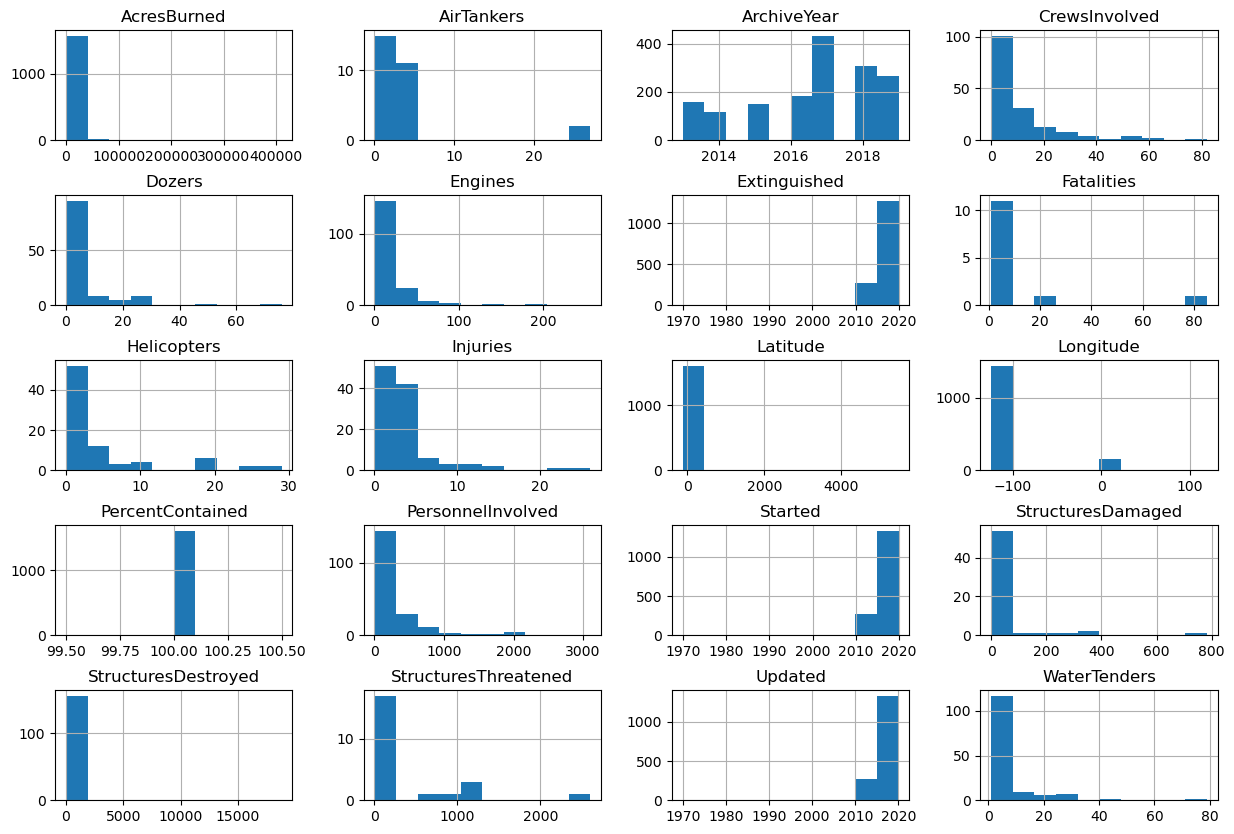

In [81]:
fire_df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

#### Climate Data
(NUMERIC) Realistic min/max amounts
Stn Id: corresponds to Stn Name? Matches station info?
ETo (in)
Precip (in)
Sol Rad (Ly/day)
Avg Vap Pres (mBars)
Max Air Temp (F)
Min Air Temp (F)
Avg Air Temp (F)
Max Rel Hum (%)
Min Rel Hum (%)
Avg Rel Hum (%)
Dew Point (F)
Avg Wind Speed (mph)
Dew Point (F)
Avg Wind Speed (mph)
Wind Run (miles)
Avg Soil Temp (F)

Date: turn into dates, ensure they fit in date range